# Machine Learning Engineer Nanodegree

## Capstone project: Exoplanet search (from Kaggle)

Student Name: Graciano Patino

Kaggle reference: https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data?/

The mission as stated in the Github (https://github.com/winterdelta/KeplerAI) is to build a classification algorithm for identifying if a particular time series input includes an exoplanet or not. It also mentions that a number of methods were tested: 1-D CNN in Torch7, XGBoost in R and PCA in Python. However, none of these methods provided strong results according to the kaggle and Github references. 


## Data Exploration


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline


In [2]:
# Load the training data from Exoplanet dataset
train_data = pd.read_csv('kepler/exoTrain.csv')

In [3]:
# Find dimensions of the train data
train_data.shape

(5087, 3198)

In [4]:
# Testing  if train_data has any null fields
testing = pd.isnull(train_data)
testing *= 1
testing2 = testing.sum()
testing2.sum() # If results is zero, then there a no fields with "null" value

0.0

In [5]:
# Getting X_train and y_train
# Using iloc to select data using position instead of label and converting to numpy array using values
X_train = train_data.iloc[:,1:].values 
y_train = train_data.iloc[:,0:1].values 

In [6]:
# Find dimensions of the X_train data
X_train.shape

(5087, 3197)

### Exploring one exoplanet record

In [7]:
exo2 = X_train[2]

In [8]:
np.amin(exo2)

-874.95

In [9]:
np.amax(exo2)

1274.59

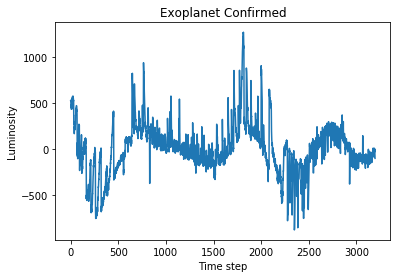

In [11]:
plt.plot(exo2)
plt.title('Exoplanet Confirmed')
plt.xlabel('Time step')
plt.ylabel('Luminosity')
plt.show()  

### Exploring one non-exoplanet record

In [12]:
nonexo100 = X_train[100]

In [13]:
np.amin(nonexo100)

-2127.3

In [14]:
np.amax(nonexo100)

212.619999999995

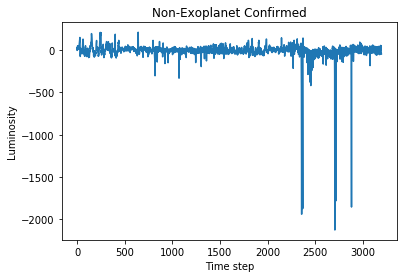

In [15]:
plt.plot(nonexo100)
plt.title('Non-Exoplanet Confirmed')
plt.xlabel('Time step')
plt.ylabel('Luminosity')
plt.show() 

In [16]:
# Find dimensions of the labels (y_train) data
y_train.shape

(5087, 1)

In [17]:
# y_train: Label is 2 for exoplanet and 1 for non-exoplanet
y_train[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]], dtype=int64)

In [18]:
y_train -= 1 # Changing labels to: 1 for exoplanet and 0 for non-exoplanet

In [19]:
y_train[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [20]:
# Load the testing data from Exoplanet dataset
test_data = pd.read_csv('kepler/exoTest.csv')

In [21]:
# Find dimensions of the test data
test_data.shape

(570, 3198)

In [22]:
# Testing  if test_data has any "null" fields
testing = pd.isnull(test_data)
testing *= 1
testing2 = testing.sum()
testing2.sum() # If results is zero, then there a no fields with "null" value

0.0

In [23]:
# Getting X_test and y_test
# Using iloc to select data using position instead of label and converting to numpy array (using values)
X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0:1].values

In [24]:
# Find dimensions of the X_test data
X_test.shape

(570, 3197)

In [25]:
# Find dimensions of the labels (y_test) data
y_test.shape

(570, 1)

In [26]:
# y_test: Label is 2 for exoplanet and 1 for non-exoplanet
y_test[:6]

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1]], dtype=int64)

In [27]:
y_test -= 1 # Changing labels to: 1 for exoplanet and 0 for non-exoplanet

In [28]:
y_test[:6]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [29]:
# Librarey fopr normalizing the data since it is not normalized according to Kaggle/Github
from sklearn.preprocessing import StandardScaler

In [30]:
# Checking X_train data
X_train

array([[ 93.85,  83.81,  20.1 , ...,  61.42,   5.08, -39.54],
       [-38.88, -33.83, -58.54, ...,   6.46,  16.  ,  19.93],
       [532.64, 535.92, 513.73, ..., -28.91, -70.02, -96.67],
       ...,
       [273.39, 278.  , 261.73, ...,  88.42,  79.07,  79.43],
       [  3.82,   2.09,  -3.29, ..., -14.55,  -6.41,  -2.55],
       [323.28, 306.36, 293.16, ..., -16.72, -14.09,  27.82]])

In [31]:
# Tranposing X_train before applying scaling such that mean is zero and variance is one
X_train.transpose()

array([[ 93.85, -38.88, 532.64, ..., 273.39,   3.82, 323.28],
       [ 83.81, -33.83, 535.92, ..., 278.  ,   2.09, 306.36],
       [ 20.1 , -58.54, 513.73, ..., 261.73,  -3.29, 293.16],
       ...,
       [ 61.42,   6.46, -28.91, ...,  88.42, -14.55, -16.72],
       [  5.08,  16.  , -70.02, ...,  79.07,  -6.41, -14.09],
       [-39.54,  19.93, -96.67, ...,  79.43,  -2.55,  27.82]])

In [32]:
# # Checking X_train data
X_test

array([[ 1.19880e+02,  1.00210e+02,  8.64600e+01, ...,  3.57800e+01,
         2.69430e+02,  5.77200e+01],
       [ 5.73659e+03,  5.69998e+03,  5.71716e+03, ..., -2.36619e+03,
        -2.29486e+03, -2.03472e+03],
       [ 8.44480e+02,  8.17490e+02,  7.70070e+02, ..., -1.62680e+02,
        -3.67900e+01,  3.06300e+01],
       ...,
       [-5.40100e+01, -4.41300e+01, -4.12300e+01, ...,  5.47000e+00,
         1.44600e+01,  1.87000e+01],
       [ 9.13600e+01,  8.56000e+01,  4.88100e+01, ..., -8.43000e+00,
        -6.48000e+00,  1.76000e+01],
       [ 3.07119e+03,  2.78253e+03,  2.60869e+03, ..., -2.77220e+02,
        -6.96300e+01,  1.21560e+02]])

In [33]:
# Tranposing X_test before applying scaling such that mean is zero and variance is one
X_test.transpose()

array([[ 1.19880e+02,  5.73659e+03,  8.44480e+02, ..., -5.40100e+01,
         9.13600e+01,  3.07119e+03],
       [ 1.00210e+02,  5.69998e+03,  8.17490e+02, ..., -4.41300e+01,
         8.56000e+01,  2.78253e+03],
       [ 8.64600e+01,  5.71716e+03,  7.70070e+02, ..., -4.12300e+01,
         4.88100e+01,  2.60869e+03],
       ...,
       [ 3.57800e+01, -2.36619e+03, -1.62680e+02, ...,  5.47000e+00,
        -8.43000e+00, -2.77220e+02],
       [ 2.69430e+02, -2.29486e+03, -3.67900e+01, ...,  1.44600e+01,
        -6.48000e+00, -6.96300e+01],
       [ 5.77200e+01, -2.03472e+03,  3.06300e+01, ...,  1.87000e+01,
         1.76000e+01,  1.21560e+02]])

In [34]:
# Standardize features by removing the mean and scaling to unit variance (sklearn.preprocessing)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Output in a numpy.ndarray
X_test = scaler.fit_transform(X_test) # Output in a numpy.ndarray

In [35]:
X_train.transpose() # Transpose back to original dimensions

array([[-0.00235557, -0.00852774,  0.01804893, ...,  0.00599336,
        -0.00654212,  0.00831333],
       [-0.00205404, -0.0074516 ,  0.01868969, ...,  0.00685579,
        -0.00580352,  0.00815701],
       [-0.00579778, -0.00938685,  0.01673115, ...,  0.00523005,
        -0.00686528,  0.00666449],
       ...,
       [ 0.0341983 ,  0.03109682,  0.02910084, ...,  0.03572195,
         0.0299112 ,  0.02978874],
       [ 0.02736753,  0.02803863,  0.02275218, ...,  0.03191466,
         0.0266614 ,  0.02618942],
       [ 0.01805157,  0.02216476,  0.01410023, ...,  0.02628002,
         0.02060995,  0.02271046]])

In [36]:
X_test.transpose() # Transpose back to original dimensions

array([[-0.03143654,  0.41497541,  0.02615413, ..., -0.04525719,
        -0.03370329,  0.20313139],
       [-0.05057432,  0.39343385,  0.00629912, ..., -0.0620191 ,
        -0.05173276,  0.16210798],
       [-0.03559448,  0.41363759,  0.01894572, ..., -0.04578193,
        -0.0385983 ,  0.16563567],
       ...,
       [-0.00907555, -0.2624662 , -0.03001166, ..., -0.01227304,
        -0.01373939, -0.04209481],
       [ 0.00470934, -0.26591026, -0.02760726, ..., -0.02219864,
        -0.02440852, -0.03107299],
       [-0.00786554, -0.22375419, -0.01066057, ..., -0.01189145,
        -0.01200494, -0.00127881]])